##### 顯示 Pillow 圖片
這篇教學會介紹如何運用 PyQt5 的 QLabel 搭配 QPixmap，在 PyQt5 中顯示 Pillow 函式庫所開啟的圖片，\
如果可以顯示 Pillow 開啟的圖片，就能進一步實現調整圖片亮度對比的功能，實作出簡單的影像調整軟體囉。

##### 安裝 Pillow 
輸入下列指令安裝 Pillow，根據個人環境使用 pip 或 pip3，如果使用 Anaconda Jupyter，已經內建 Pillow 函式庫。
* pip install Pillow

##### 顯示 Pillow 圖片 
載入對應的函式庫時，額外載入 PIL 的 ImageQt 模組，這個模組可以將 Pillow 所讀取的圖片檔案，轉換成可以在 QPixmap 中顯示的格式，\
讀取之後就能利用「使用 QLabel + QPixmap」方法顯示圖片。

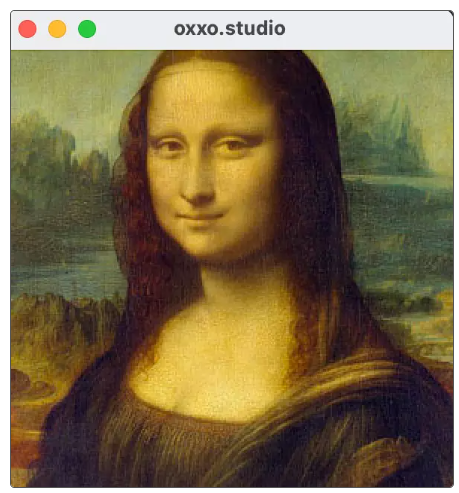

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys
from PIL import Image, ImageQt

app = QtWidgets.QApplication(sys.argv)
MainWindow = QtWidgets.QMainWindow()
MainWindow.setObjectName("MainWindow")
MainWindow.setWindowTitle("oxxo.studio")
MainWindow.resize(300, 300)

img = Image.open('Data\image\烤雞.jpg')    # 使用 Pillow 開啟圖片
qimg = ImageQt.toqimage(img)               # 轉換成 QPixmap 格式
canvas = QPixmap(300,300).fromImage(qimg)  # 建立 QPixmap 畫布，讀取圖片
label = QtWidgets.QLabel(MainWindow)       # 建立 QLabel
label.setGeometry(0, 0, 300, 300)          # 設定 QLabel 尺寸位置
label.setPixmap(canvas)                    # QLabel 放入畫布

MainWindow.show()
sys.exit(app.exec_())

也可以改用 class 的寫法：

- **PIL (Pillow):** 这是一个强大的图像处理库，用于打开、操作和保存多种格式的图像文件。
- **ImageQt module:** 这个模块提供了将 PIL 的 Image 对象转换成 PyQt5 的 QImage 对象的功能。QImage 对象可以进一步转换为 QPixmap，用于在 PyQt 应用程序中显示。
- **QPixmap:** 在 PyQt5 中，QPixmap 是用来处理和显示图像的类。它比 QImage 提供了更多针对显示优化的功能。
- **QLabel:** QLabel 是 PyQt5 中用于显示文本或图像的一个控件。
- **QApplication:** 管理 GUI 应用程序的控制流和主要设置，每个 PyQt5 应用程序只有一个 QApplication 对象。

In [ ]:
# 导入必要的 PyQt5 模块，用于构建图形用户界面。
from PyQt5 import QtWidgets
# 导入 PyQt5 中的 QtGui 和 QtCore 模块，包含用于图形界面和核心功能的组件。
from PyQt5.QtGui import *
from PyQt5.QtCore import *
import sys  # 导入 sys 模块，用于处理与 Python 解释器相关的操作，如命令行参数和程序退出。

# 导入 PIL 模块，用于处理图像。
from PIL import Image, ImageQt

# 定义 MyWidget 类，继承自 QtWidgets.QWidget，提供基础的窗口功能。
class MyWidget(QtWidgets.QWidget):
    # 类的初始化方法。
    def __init__(self):
        super().__init__()  # 调用父类的构造函数，进行基本的窗口设置。
        self.setWindowTitle('oxxo.studio')  # 设置窗口标题。
        self.resize(300, 300)  # 设置窗口大小。
        self.setUpdatesEnabled(True)  # 确保窗口可以更新。
        self.ui()  # 初始化用户界面元素。

    # 定义用户界面布局和控件。
    def ui(self):
        img = Image.open('mona.jpg')  # 使用 PIL 打开图片文件。
        qimg = ImageQt.toqimage(img)  # 将 PIL 图像对象转换为 PyQt 可用的 QImage 对象。
        self.canvas = QPixmap(300,300).fromImage(qimg)  # 从 QImage 创建 QPixmap 对象，并设置为适合窗口大小。
        self.label = QtWidgets.QLabel(self)  # 创建 QLabel 对象用于显示图片。
        self.label.setGeometry(0, 0, 300, 300)  # 设置标签的位置和大小。
        self.label.setPixmap(self.canvas)  # 将 QPixmap 对象设置为标签的显示内容。

# 程序的入口点。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # 创建 QApplication 实例，这是每个 PyQt 应用程序所必需的。
    Form = MyWidget()  # 创建 MyWidget 类的实例。
    Form.show()  # 显示窗口。
    sys.exit(app.exec_())  # 启动应用程序的事件循环，并在窗口关闭时退出程序。

##### 顯示 Pillow 調整後的圖片 
因為已經是透過 Pillow 載入圖片，所以就能善用 Pillow 影像處理的功能，例如參考「調整圖片亮度、對比、飽和度和銳利度」教學範例，\
額外載入 Pillow 的 ImageEnhance 模組，就能在 PyQt5 的視窗介面中，呈現使用 Pillow 調整後的圖片。

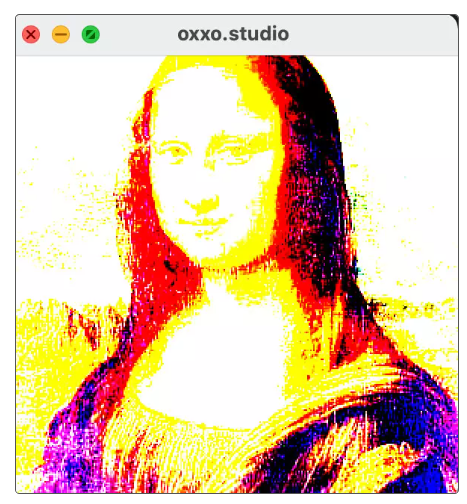

In [ ]:
from PyQt5 import QtWidgets
from PyQt5.QtGui import QPixmap, QImage
from PyQt5.QtWidgets import QLabel
from PyQt5.QtCore import Qt
import sys
from PIL import Image, ImageEnhance
from PIL.ImageQt import ImageQt  # 确保正确导入 ImageQt

def main():
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    MainWindow.setObjectName("MainWindow")
    MainWindow.setWindowTitle("oxxo.studio")
    MainWindow.resize(1200, 1200)

    try:
        # 打开图片并增强其亮度和对比度
        img = Image.open(r'Data\image\Patrick Star1.jpg')  # 确保路径是正确的
        img = ImageEnhance.Brightness(img).enhance(5)
        img = ImageEnhance.Contrast(img).enhance(5)

        # 将 PIL 图像转换为 QImage 对象
        qimg = ImageQt(img).copy()  # 使用 ImageQt 创建 QImage 对象并进行拷贝以确保它在 PyQt 中可用

        # 将 QImage 转换为 QPixmap
        pixmap = QPixmap.fromImage(qimg)

        # 创建一个 QLabel 来显示图片
        label = QLabel(MainWindow)
        label.setGeometry(0, 0, 1500, 1500)
        label.setPixmap(pixmap)

        # 显示主窗口
        MainWindow.show()
        sys.exit(app.exec_())
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == '__main__':
    main()

也可以改用 class 的寫法：

In [ ]:
# 导入必要的 PyQt5 模块，这些模块包括用于构建图形用户界面的组件。
from PyQt5 import QtWidgets
from PyQt5.QtGui import *  # 导入包含图形界面元素的模块，如 QPixmap, QImage。
from PyQt5.QtCore import *  # 导入包含核心功能的模块，如 Qt 核心类。
import sys  # 导入 sys 模块，用于接入与 Python 解释器相关的命令和函数。

# 导入 PIL 模块，用于图像处理。
from PIL import Image, ImageQt, ImageEnhance  # Image 用于图像操作，ImageQt 用于图像与Qt的转换，ImageEnhance 用于图像增强。

# 定义 MyWidget 类，继承自 QtWidgets.QWidget，作为主窗口类。
class MyWidget(QtWidgets.QWidget):
    # 类的初始化方法。
    def __init__(self):
        super().__init__()  # 调用基类的构造函数初始化窗口。
        self.setWindowTitle('oxxo.studio')  # 设置窗口的标题。
        self.resize(300, 300)  # 设置窗口的大小。
        self.setUpdatesEnabled(True)  # 确保窗口可以进行更新。
        self.ui()  # 调用自定义的 ui 方法来创建用户界面。

    # 定义用户界面布局和控件。
    def ui(self):
        img = Image.open(r'Data\image\icon2.png')  # 使用 PIL 打开图像文件。
        # 使用 ImageEnhance 模块增强图像的亮度。
        img = ImageEnhance.Brightness(img).enhance(5)  # 将亮度增强5倍。
        # 使用 ImageEnhance 模块增强图像的对比度。
        img = ImageEnhance.Contrast(img).enhance(5)    # 将对比度增强5倍。
        
        qimg = ImageQt.toqimage(img)  # 将 PIL 图像转换成 PyQt5 的 QImage 对象。
        self.canvas = QPixmap(300, 300).fromImage(qimg)  # 将 QImage 转换成 QPixmap，并设置为适合窗口大小。
        
        self.label = QtWidgets.QLabel(self)  # 创建一个 QLabel 对象用于显示图像。
        self.label.setGeometry(0, 0, 300, 300)  # 设置 QLabel 的位置和大小。
        self.label.setPixmap(self.canvas)  # 设置 QPixmap 为 QLabel 的显示内容。

# 程序入口点。
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)  # 创建 QApplication 实例，每个 PyQt5 应用程序必需。
    Form = MyWidget()  # 创建 MyWidget 类的实例。
    Form.show()  # 显示窗口。
    sys.exit(app.exec_())  # 启动应用程序的事件循环，等待用户操作。